In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
new_data = pd.read_csv('../ai_CUSTOMER_WITHOUT_NULLS.csv')

print(new_data.shape)
print(new_data.columns)
new_data.head()

(16000, 37)
Index(['Sales_Transaction_ID', 'Store_Number', 'Business_Date',
       'Loyalty_Card_Number', 'Customer_ID', 'Transaction_Number',
       'Total_Selling_Price_Amt', 'Sales_GAAP_Qty', 'Sales_GAAP_Amt',
       'COGS_GAAP_Amt', 'Gross_Margin_GAAP_Amt', 'HW_Qty', 'Non_HW_Qty',
       'HW_Gaming_Qty', 'Non_HW_Gaming_Qty', 'SW_Qty', 'Non_SW_Qty',
       'SW_Gaming_Qty', 'Non_SW_Gaming_Qty', 'HW_Attach_Qty',
       'New_HW_Attach_Qty', 'PreOwned_HW_Attach_Qty', 'SW_Attach_Qty',
       'GPG_Attach', 'PRP_Qty', 'GPG_Qty', 'PRP_Attach', 'Has_Sales_Trans',
       'Has_GAAP_Return', 'Has_GAAP_Sale', 'Has_Web_Creation',
       'Has_PUR_Membership', 'Has_Pro_Renewal', 'Has_Pro_Upgrade', 'Tier',
       'Tier_Entered_Date', 'Tier_Expiration_Date'],
      dtype='object')


,Sales_Transaction_ID,Store_Number,Business_Date,Loyalty_Card_Number,Customer_ID,Transaction_Number,Total_Selling_Price_Amt,Sales_GAAP_Qty,Sales_GAAP_Amt,COGS_GAAP_Amt,...,Has_Sales_Trans,Has_GAAP_Return,Has_GAAP_Sale,Has_Web_Creation,Has_PUR_Membership,Has_Pro_Renewal,Has_Pro_Upgrade,Tier,Tier_Entered_Date,Tier_Expiration_Date
0,8716850993,5886,2020-12-08,3881086284395,1289830408,38,476.28,18,461.29,171.17,...,1,0,1,0,1,0,1,Pro,2020-12-08,2021-12-08
1,8716909311,7676,2020-12-08,3881143982262,1301120666,41,384.89,13,369.90,279.66,...,1,0,1,0,1,0,1,Pro,2020-12-08,2021-12-09
2,8716742651,3518,2020-12-08,3880155214150,1299105246,44,464.89,12,446.77,356.28,...,1,0,1,0,1,0,0,Player,2020-08-09,2099-01-01
3,8716680067,1611,2020-12-08,3881143951705,1130029413,2,894.58,16,879.17,723.50,...,1,0,1,0,1,0,1,Pro,2020-12-08,2021-12-08
4,8716752606,3700,2020-12-08,3881084015247,1117061055,29,303.37,15,298.37,218.65,...,1,0,1,0,1,0,1,Pro,2020-08-10,2021-08-10


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 37 columns):
Sales_Transaction_ID       16000 non-null int64
Store_Number               16000 non-null int64
Business_Date              16000 non-null object
Loyalty_Card_Number        16000 non-null int64
Customer_ID                16000 non-null int64
Transaction_Number         16000 non-null int64
Total_Selling_Price_Amt    16000 non-null float64
Sales_GAAP_Qty             16000 non-null int64
Sales_GAAP_Amt             16000 non-null float64
COGS_GAAP_Amt              16000 non-null float64
Gross_Margin_GAAP_Amt      16000 non-null float64
HW_Qty                     16000 non-null int64
Non_HW_Qty                 16000 non-null int64
HW_Gaming_Qty              16000 non-null int64
Non_HW_Gaming_Qty          16000 non-null int64
SW_Qty                     16000 non-null int64
Non_SW_Qty                 16000 non-null int64
SW_Gaming_Qty              16000 non-null int64
Non_SW_Gaming_Qty 

In [5]:
new_data.describe()

,Sales_Transaction_ID,Store_Number,Loyalty_Card_Number,Customer_ID,Transaction_Number,Total_Selling_Price_Amt,Sales_GAAP_Qty,Sales_GAAP_Amt,COGS_GAAP_Amt,Gross_Margin_GAAP_Amt,...,PRP_Qty,GPG_Qty,PRP_Attach,Has_Sales_Trans,Has_GAAP_Return,Has_GAAP_Sale,Has_Web_Creation,Has_PUR_Membership,Has_Pro_Renewal,Has_Pro_Upgrade
count,1.600000e+04,16000.000000,1.600000e+04,1.600000e+04,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,...,16000.000000,16000.000000,16000.000000,16000.0,16000.000000,16000.000000,16000.0,16000.0,16000.0,16000.000000
mean,8.494272e+09,4081.431562,3.879668e+12,1.178873e+09,1.813051e+06,230.430493,7.808063,206.375708,151.891009,54.484699,...,0.631875,1.602000,0.272701,1.0,0.347625,0.711562,0.0,1.0,0.0,0.589313
std,1.156224e+08,2125.026094,6.867562e+10,1.079559e+08,1.567623e+07,447.763230,11.446792,418.291790,311.861982,138.957212,...,1.145072,2.979371,0.481147,0.0,0.476231,0.453050,0.0,0.0,0.0,0.491974
min,8.317867e+09,6.000000,2.405638e+08,1.002773e+09,2.000000e+00,-1827.160000,-39.000000,-1827.160000,-1628.160000,-1085.410000,...,-8.000000,-20.000000,-2.000000,1.0,0.000000,0.000000,0.0,1.0,0.0,0.000000
25%,8.396850e+09,2515.000000,3.880014e+12,1.077219e+09,1.100000e+01,-129.565000,-4.000000,-131.982500,-42.922500,-67.910000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,1.0,0.0,0.000000
50%,8.474089e+09,4070.000000,3.881064e+12,1.259576e+09,2.400000e+01,212.940000,12.000000,197.555000,98.530000,62.315000,...,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.0,1.0,0.0,1.000000
75%,8.590848e+09,5889.000000,3.881124e+12,1.284589e+09,4.400000e+01,524.942500,15.000000,489.300000,353.760000,148.502500,...,1.000000,3.000000,0.500000,1.0,1.000000,1.000000,0.0,1.0,0.0,1.000000
max,8.732286e+09,7828.000000,3.887027e+12,1.301949e+09,1.513607e+08,6326.610000,163.000000,6326.610000,5220.640000,1259.760000,...,10.000000,58.000000,5.000000,1.0,1.000000,1.000000,0.0,1.0,0.0,1.000000


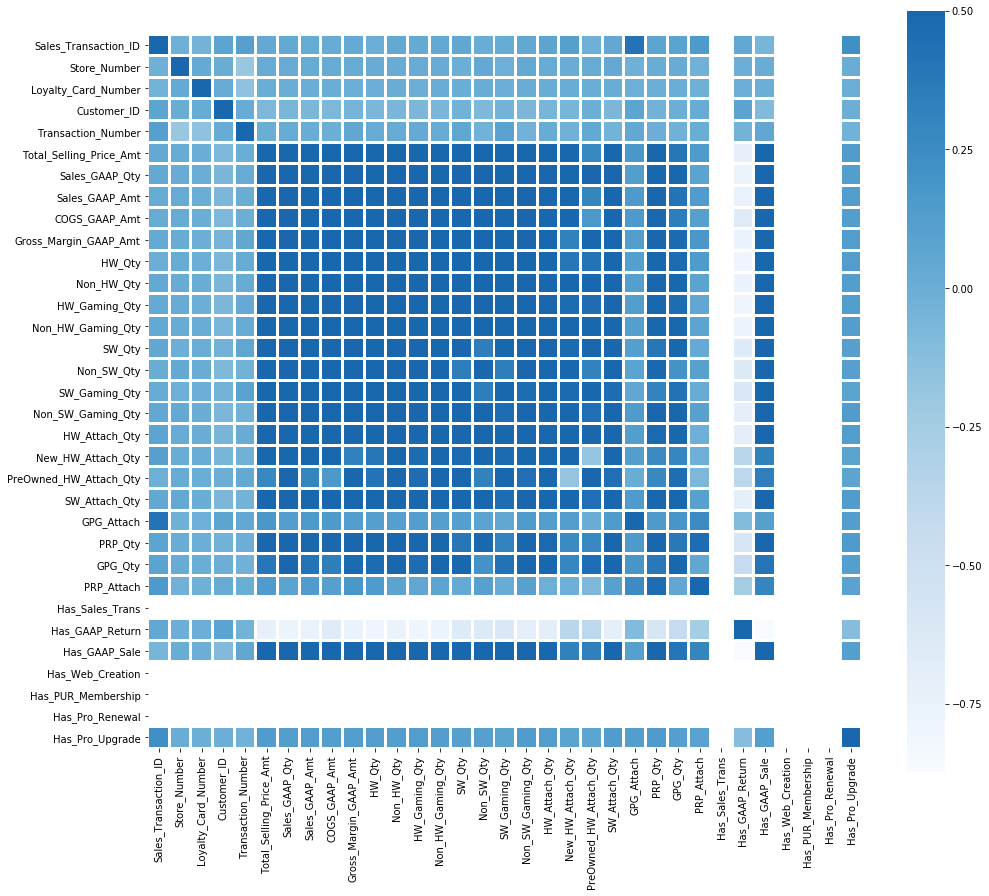

In [6]:
corr_new = new_data.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr_new, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [7]:
feat_to_drop = ['Customer_ID',
                'Has_Pro_Renewal',
                'Has_Web_Creation', 
                'Has_PUR_Membership', 
                'Has_Sales_Trans']

prep_new_data = new_data.drop(feat_to_drop, axis=1)

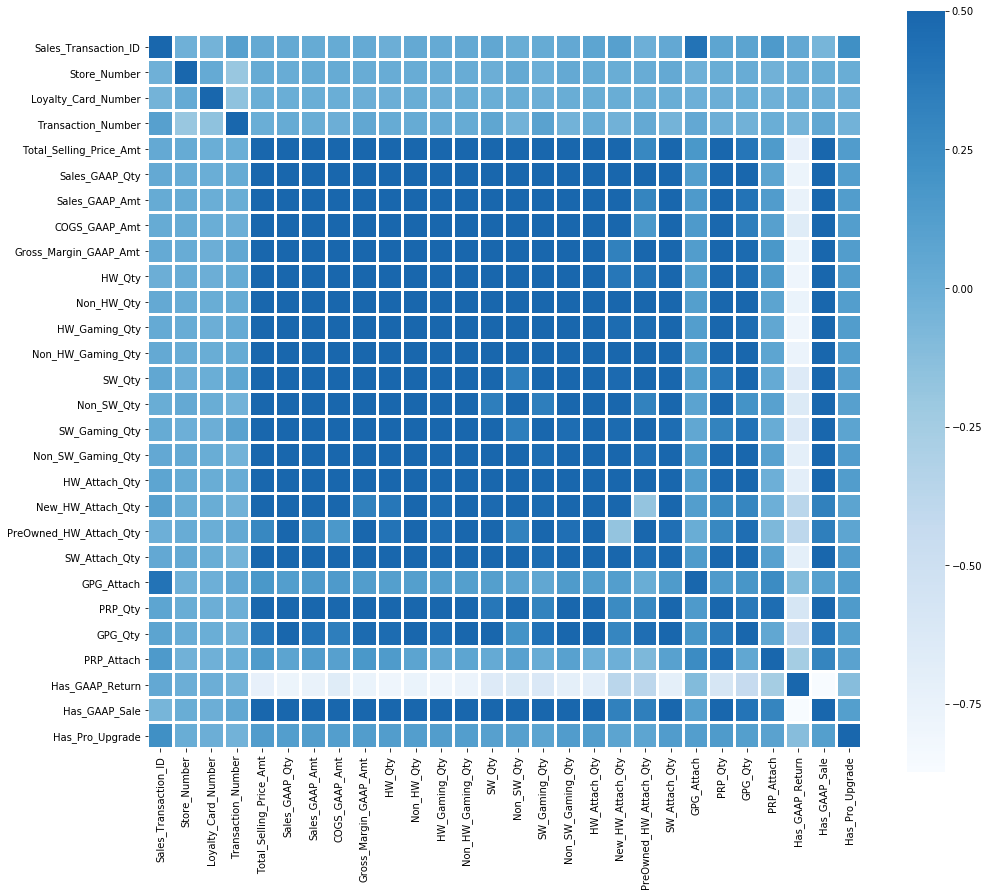

In [8]:
corr_new_preped = prep_new_data.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr_new_preped, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [ ]:
"""
# converting Business_Date, Tier_Entered_Date, Tier_Expiration_Date from string to datetime

prep_new_data.Business_Date = pd.to_datetime(prep_new_data.Business_Date)
prep_new_data.Tier_Entered_Date = pd.to_datetime(prep_new_data.Tier_Entered_Date )
prep_new_data.Tier_Expiration_Date = pd.to_datetime(prep_new_data.Tier_Expiration_Date)
"""





In [19]:
# label encoding all the features 

print(prep_new_data.columns)


# Make copy to avoid changing original data 
label_categ = prep_new_data.copy()
print(label_categ.head())

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in prep_new_data.columns:
    label_categ[col] = label_encoder.fit_transform(label_categ[col])
    

label_categ.Tier = label_encoder.fit_transform(label_categ.Tier)

print(label_categ.Tier.head())

Index(['Sales_Transaction_ID', 'Store_Number', 'Business_Date',
       'Loyalty_Card_Number', 'Transaction_Number', 'Total_Selling_Price_Amt',
       'Sales_GAAP_Qty', 'Sales_GAAP_Amt', 'COGS_GAAP_Amt',
       'Gross_Margin_GAAP_Amt', 'HW_Qty', 'Non_HW_Qty', 'HW_Gaming_Qty',
       'Non_HW_Gaming_Qty', 'SW_Qty', 'Non_SW_Qty', 'SW_Gaming_Qty',
       'Non_SW_Gaming_Qty', 'HW_Attach_Qty', 'New_HW_Attach_Qty',
       'PreOwned_HW_Attach_Qty', 'SW_Attach_Qty', 'GPG_Attach', 'PRP_Qty',
       'GPG_Qty', 'PRP_Attach', 'Has_GAAP_Return', 'Has_GAAP_Sale',
       'Has_Pro_Upgrade', 'Tier', 'Tier_Entered_Date', 'Tier_Expiration_Date'],
      dtype='object')
   Sales_Transaction_ID  Store_Number Business_Date  Loyalty_Card_Number  \
0            8716850993          5886    2020-12-08        3881086284395   
1            8716909311          7676    2020-12-08        3881143982262   
2            8716742651          3518    2020-12-08        3880155214150   
3            8716680067          1611   

In [14]:
label_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 32 columns):
Sales_Transaction_ID       16000 non-null int64
Store_Number               16000 non-null int64
Business_Date              16000 non-null int32
Loyalty_Card_Number        16000 non-null int64
Transaction_Number         16000 non-null int64
Total_Selling_Price_Amt    16000 non-null int64
Sales_GAAP_Qty             16000 non-null int64
Sales_GAAP_Amt             16000 non-null int64
COGS_GAAP_Amt              16000 non-null int64
Gross_Margin_GAAP_Amt      16000 non-null int64
HW_Qty                     16000 non-null int64
Non_HW_Qty                 16000 non-null int64
HW_Gaming_Qty              16000 non-null int64
Non_HW_Gaming_Qty          16000 non-null int64
SW_Qty                     16000 non-null int64
Non_SW_Qty                 16000 non-null int64
SW_Gaming_Qty              16000 non-null int64
Non_SW_Gaming_Qty          16000 non-null int64
HW_Attach_Qty              

In [21]:
# RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


predictors_RF_HWQ = prep_new_data.drop(['Business_Date', 
                                        'HW_Qty', 'SW_Qty',
                                        "Tier",
                                        'Tier_Entered_Date', 
                                        'Tier_Expiration_Date'], axis=1)


targets_RF_HWQ = prep_new_data.Has_Pro_Upgrade

X_train, X_test, y_train, y_test  =   train_test_split(predictors_RF_HWQ, targets_RF_HWQ, test_size=.3)

print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )

forest_model_RF_HWQ = RandomForestRegressor(random_state=1)
forest_model_RF_HWQ.fit(X_train, y_train)
prop_preds_new = forest_model_RF_HWQ.predict(X_test)
print(mean_absolute_error(y_test, prop_preds_new))

Predictor - Training :  (11200, 26) Predictor - Testing :  (4800, 26)
0.0


C:\Users\MMQuant\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
# predicting with Gaussian naive_bayes
clf = GaussianNB()
clf = clf.fit(X_train, y_train)

predictions_GAUclf = clf.predict(X_test)

#Analyze accuracy of predictions
print('confusion matrix:')
sklearn.metrics.confusion_matrix(y_test, predictions_GAUclf)

confusion matrix:


array([[ 947, 1034],
       [  27, 2792]], dtype=int64)

In [23]:
report = classification_report(y_test, predictions_GAUclf)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.48      0.64      1981
           1       0.73      0.99      0.84      2819

   micro avg       0.78      0.78      0.78      4800
   macro avg       0.85      0.73      0.74      4800
weighted avg       0.83      0.78      0.76      4800

